# Chris Silos
# SYS 611 HW 5
# 5.1
# d)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# List to hold states when Cobb is on base (first, second, or third)
on_base = [1,2,3]

# define the state transition function
def _delta(q):
    r = np.random.rand()

    # if Cobb starts from the bench
    if q == 0:
        if r <= 0.52:
            # Cobb gets out
            return 0
        elif 0.520 < r <= 0.933:
            # Cobb hits a single
            return 1
        elif 0.933 < r <= 0.977:
            # Cobb hits a double
            return 2
        elif 0.977 < r <= 0.996:
            # Cobb hits a triple
            return 3
        else:
            # Cobb hits a home run
            return 4

    # if Cobb starts on first, second, or third
    elif q in on_base:
        if r <= 0.284:
            # gets caught stealing
            return 0
        else:
            return(q+1)
            
    # if Cobb arrives at home plate
    else:
        return 0

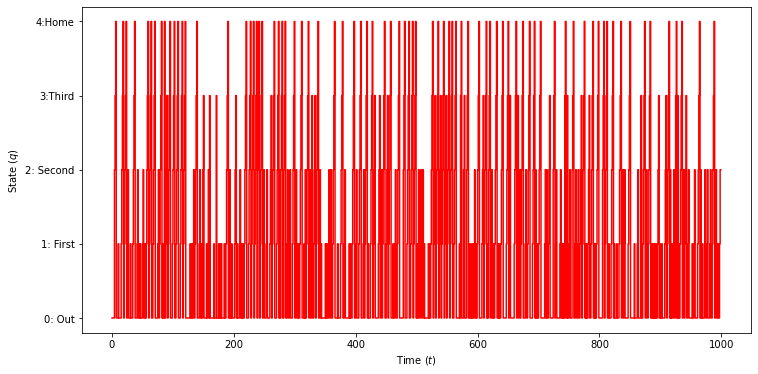

In [29]:
# define the number of samples and create a state trajectory
num_samples = 1000
q = np.zeros(num_samples)

# perform all the state transitions
for t in range(num_samples - 1):
    q[t+1] = _delta(q[t])

# create a plot of the state trajectory
plt.figure(figsize=(12,6))
plt.step(range(num_samples), q, '-r')
plt.xlabel('Time ($t$)')
plt.ylabel('State ($q$)')
plt.yticks([0,1,2,3,4], ['0: Out','1: First','2: Second', '3:Third', '4:Home'])
plt.show()

In [30]:
# estimate the stationary distribution from the samples
pi = np.zeros(5)
for i in range(5):
    pi[i] = np.sum(q==i)/num_samples

print('estimated stationary distribution (solved using simulation):')
print(f'P(q=0) = {pi[0]:.3f} (out)')
print(f'P(q=1) = {pi[1]:.3f} (first)')
print(f'P(q=2) = {pi[2]:.3f} (second)')
print(f'P(q=3) = {pi[3]:.3f} (third)')
print(f'P(q=4) = {pi[4]:.3f} (home)')




estimated stationary distribution (solved using simulation):
P(q=0) = 0.466 (out)
P(q=1) = 0.195 (first)
P(q=2) = 0.153 (second)
P(q=3) = 0.106 (third)
P(q=4) = 0.080 (home)
